# SYSC 535 Modeling And Simulation
## LAB 03: AGENT BASED MODELS
**Christan Hower** 

*Spring '19*

### AGENT BASED MODEL
#### PREDATOR-PREY MODEL

In [161]:
from pylab import *
import copy as cp
import pandas as pd
%matplotlib inline

nr = 500. # carrying capacity of rabbits

r_init = 100 # initial rabbit population
mr = 0.03 # magnitude of movement of rabbits
dr = 4.0 # death rate of rabbits when it faces foxes
rr = 0.1 # reproduction rate of rabbits

f_init = 30 # initial fox population
mf = 0.05 # magnitude of movement of foxes
df = 0.1 # death rate of foxes when there is no food
rf = 0.5 # reproduction rate of foxes

cd = 0.02 # radius for collision detection
cdsq = cd ** 2

In [162]:
class agent:
    pass

class predatorPrey:
    def __init__(self):
        columns = ['foxes', 'rabbits']
        self.history = pd.DataFrame(columns = [columns])
        self.agents = []
        for i in range(r_init + f_init):
            ag = agent()
            ag.type = 'r' if i < r_init else 'f'
            ag.x = random()
            ag.y = random()
            self.agents.append(ag)
            
    
    def __observe__(self):

        cla()
        rabbits = [ag for ag in self.agents if ag.type == 'r']
        
        if len(rabbits) > 0:
            x = [ag.x for ag in rabbits]
            y = [ag.y for ag in rabbits]
            plot(x, y, 'b.')
        foxes = [ag for ag in self.agents if ag.type == 'f']
        
        if len(foxes) > 0:
            x = [ag.x for ag in foxes]
            y = [ag.y for ag in foxes]
            plot(x, y, 'ro')
        axis('image')
        axis([0, 1, 0, 1])
    
    def __update__(self):

        if self.agents == []:
            return
    
        ag = self.agents[randint(len(self.agents))]
    
        # simulating random movement
        m = mr if ag.type == 'r' else mf
        ag.x += uniform(-m, m)
        ag.y += uniform(-m, m)
        ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
        ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y
    
        # detecting collision and simulating death or birth
        neighbors = [nb for nb in self.agents if nb.type != ag.type
                     and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cdsq]
    
        if ag.type == 'r':
            if len(neighbors) > 0: # if there are foxes nearby
                if random() < dr:
                    self.agents.remove(ag)
                    return
            if random() < rr*(1-sum(1 for x in self.agents if x.type == 'r')/nr):
                self.agents.append(cp.copy(ag))
        else:
            if len(neighbors) == 0: # if there are no rabbits nearby
                if random() < df:
                    self.agents.remove(ag)
                    return
            else: # if there are rabbits nearby
                if random() < rf:
                    self.agents.append(cp.copy(ag))
    
    def __update_one_unit_time__(self):
        t = 0.
        while t < 1. and len(self.agents) > 0:
            t += 1. / len(self.agents)
            self.__update__()
            
            
    def run_sim(self, nsims = 20):
        t = 0 
        while t < nsims:
            self.__observe__()
            self.__update_one_unit_time__()
            self.get_pop()
            t += 1            

    def get_pop(self):
        foxes = [ag for ag in self.agents if ag.type == 'f']
        rabbits = [ag for ag in self.agents if ag.type == 'r']
        self.history = self.history.append({'foxes': len(foxes), 'rabbits': len(rabbits)}, ignore_index=True)
        
    def get_summary(self):
        self.summary = pd.DataFrame(columns = ['animal','mean', 'min', 'max'])
        fmean = self.history['foxes'].mean()
        fmin = self.history['foxes'].min()
        fmax = self.history['foxes'].max()
    
        rmean = self.history['rabbits'].mean()
        rmin = self.history['rabbits'].min()
        rmax = self.history['rabbits'].max()
        
        self.summary = self.summary.append({'animal': 'foxes', 'mean': fmean,
                                          'min' : fmin, 'max' : fmax}, ignore_index=True)
        self.summary = self.summary.append({'animal': 'rabbits', 'mean': rmean,
                                          'min' : rmin, 'max' : rmax}, ignore_index=True)
        
        return self.summary
        

In [163]:
model = predatorPrey()

,animal,mean,min,max
0,foxes,45.24,17,124
1,rabbits,315.68,101,400


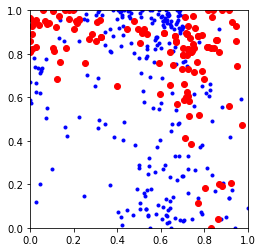

In [165]:
model.run_sim(50)
model.get_summary()

The population dynamics maintain a reasonable balance with this configuration. There is more variation in the rabbit population than in the fox population. 

,animal,mean,min,max
0,foxes,6.38,0,26
1,rabbits,323.88,100,483


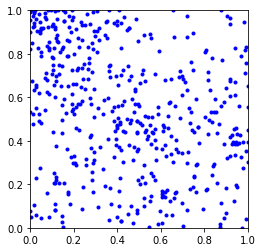

In [166]:
nr = 500. # carrying capacity of rabbits

r_init = 100 # initial rabbit population
mr = 0.03 # magnitude of movement of rabbits
dr = 6.0 # death rate of rabbits when it faces foxes
rr = 0.1 # reproduction rate of rabbits

f_init = 30 # initial fox population
mf = 0.05 # magnitude of movement of foxes
df = 0.1 # death rate of foxes when there is no food
rf = 0.2 # reproduction rate of foxes

cd = 0.02 # radius for collision detection
cdsq = cd ** 2

model = predatorPrey()
model.run_sim(50)
model.get_summary()

Here the population of foxes gets close to extinction. By increasing the death rate of rabbits and decreasing the reproduction rate of foxes the population dynamics change such that the fox population has a hard time surviving. Repeated runs yield extinctions.

Agent based modeling is an interesting approach to understanding a system. It seems plausible that there are many processes that can be described with a few simple local actions and thus the results of this type of model would yield results similar to the real system. It is also a nice paradigm for exploration or introducing new behaviors after some amount of time.  